# Creating Visualizations While Exploring Data

## Justin Bartell



### Graph 1: US Annual Pay by RACE

In [9]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pd.options.mode.chained_assignment = None

params="RACE_GROUP,RACE_GROUP_LABEL,PAYANN,EMP"
location="us:*"
key="d4ceac55dc7bdf83bc5742bf6fe9f5deb05d8b53"
url=f"https://api.census.gov/data/2018/abscs?get={params}&for={location}&key={key}"

full_list=json.loads(requests.get(url).text)
headers = full_list.pop(0)
df = pd.DataFrame(full_list, columns=headers)
df[:]

,RACE_GROUP,RACE_GROUP_LABEL,PAYANN,EMP,us
0,00,Total,6937240308,128196406,1
1,40,Black or African American,36939229,1188819,1
2,30,White,2580104120,56877432,1
3,50,American Indian and Alaska Native,8241262,200256,1
4,60,Asian,175800264,5090065,1
5,90,Minority,323027545,9432081,1
6,70,Native Hawaiian and Other Pacific Islander,2127545,54446,1
7,91,Equally minority/nonminority,33940273,843404,1
8,92,Nonminority,2451472104,53190299,1


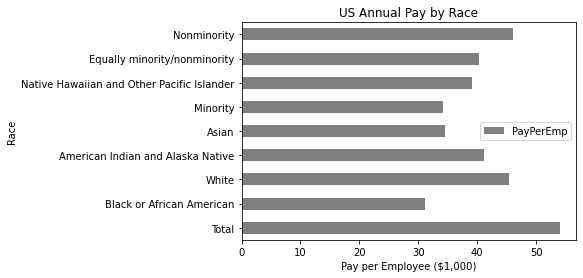

In [11]:
to_plot=df[['RACE_GROUP_LABEL']]
to_plot['PAYANN']=pd.to_numeric(df['PAYANN'])
to_plot['EMP']=pd.to_numeric(df['EMP'])
to_plot['PayPerEmp']=to_plot['PAYANN']/to_plot['EMP']
to_plot.drop(['PAYANN','EMP'],inplace=True,axis=1)
to_plot.set_index('RACE_GROUP_LABEL',inplace=True)

ax1=to_plot.plot(title='US Annual Pay by Race',kind='barh')
ax1.set_ylabel('Race')
ax1.set_xlabel('Pay per Employee ($1,000)')
plt.show()











### Graph 2: US Annual Pay by STATE

In [3]:
url='https://api.census.gov/data/2018/abscs?get=NAME,PAYANN,EMP&for=state:11,27,55&key=d4ceac55dc7bdf83bc5742bf6fe9f5deb05d8b53'
full_list=json.loads(requests.get(url).text)
headers = full_list.pop(0)
df = pd.DataFrame(full_list, columns=headers)
df[:]

,NAME,PAYANN,EMP,state
0,Wisconsin,129965242,2595886,55
1,District of Columbia,37728542,455652,11
2,Minnesota,146712564,2673014,27


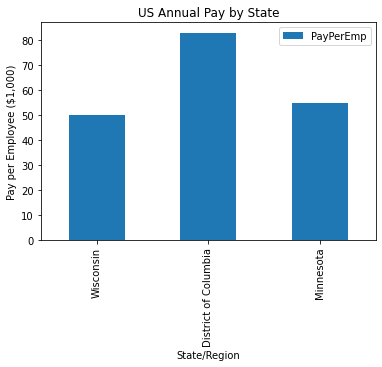

In [4]:
to_plot=df[['NAME']]
to_plot['PAYANN']=pd.to_numeric(df['PAYANN'])
to_plot['EMP']=pd.to_numeric(df['EMP'])
to_plot['PayPerEmp']=to_plot['PAYANN']/to_plot['EMP']
to_plot.drop(['PAYANN','EMP'],inplace=True,axis=1)
to_plot.set_index('NAME',inplace=True)

ax2=to_plot.plot(title='US Annual Pay by State',kind='bar')
ax2.set_xlabel('State/Region')
ax2.set_ylabel('Pay per Employee ($1,000)')
plt.show()











### Graph 3: US Annual Pay by SECTOR

In [5]:
url='https://api.census.gov/data/2018/abscs?get=NAICS2017,NAICS2017_LABEL,EMP,PAYANN&for=us:*&key=d4ceac55dc7bdf83bc5742bf6fe9f5deb05d8b53'
full_list=json.loads(requests.get(url).text)
headers = full_list.pop(0)
df = pd.DataFrame(full_list, columns=headers)
df[:]

,NAICS2017,NAICS2017_LABEL,EMP,PAYANN,us
0,00,Total for all sectors,128196406,6937240308,1
1,11,"Agriculture, forestry, fishing and hunting",599905,11184335,1
2,21,"Mining, quarrying, and oil and gas extraction",638283,60692728,1
3,23,Construction,6754898,424172015,1
4,31-33,Manufacturing,12006094,724009247,1
5,42,Wholesale trade,6109303,454494182,1
6,44-45,Retail trade,15875876,462509026,1
7,48-49,Transportation and warehousing,5049216,263999071,1
8,51,Information,3673165,390433031,1
9,52,Finance and insurance,6643953,681850345,1


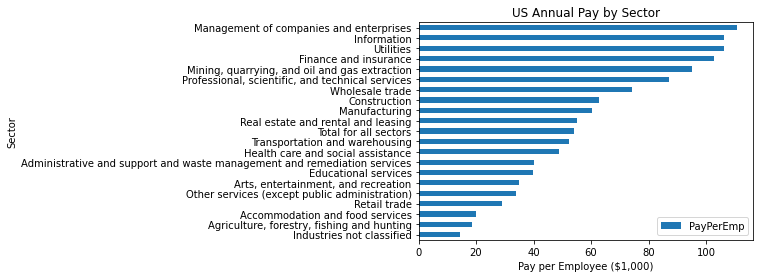

In [6]:
to_plot=df[['NAICS2017_LABEL']]
to_plot['PAYANN']=pd.to_numeric(df['PAYANN'])
to_plot['EMP']=pd.to_numeric(df['EMP'])
to_plot['PayPerEmp']=to_plot['PAYANN']/to_plot['EMP']
to_plot.drop(['PAYANN','EMP'],inplace=True,axis=1)
to_plot.set_index('NAICS2017_LABEL',inplace=True)
to_plot.sort_values(by='PayPerEmp',inplace=True)

ax3=to_plot.plot(title='US Annual Pay by Sector',kind='barh')
ax3.set_ylabel('Sector')
ax3.set_xlabel('Pay per Employee ($1,000)')
plt.show()

### Graph 4+5: Scatterplots of US Annual Pay and Employee Number Over Time

In [7]:
params="YEAR,EMP,PAYANN"
location="us:*"
key="d4ceac55dc7bdf83bc5742bf6fe9f5deb05d8b53"

full_list=[]
for year in range(2017,2020):
    url=f"https://api.census.gov/data/{year}/abscs?get={params}&for={location}&key={key}"
    temp=json.loads(requests.get(url).text)
    headers=temp.pop(0)
    for row in temp:
        full_list.append(row)
df = pd.DataFrame(full_list, columns=headers)
df[:]


,YEAR,EMP,PAYANN,us
0,2017,127738274,6534271084,1
1,2018,128196406,6937240308,1
2,2019,128898226,7227585564,1


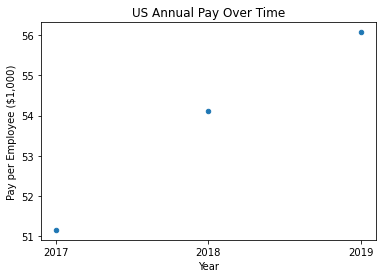

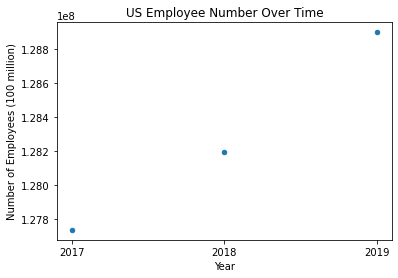

In [8]:
to_plot=df.copy()
to_plot['YEAR']=pd.to_numeric(df['YEAR'])
to_plot['PAYANN']=pd.to_numeric(df['PAYANN'])
to_plot['EMP']=pd.to_numeric(df['EMP'])
to_plot['PayPerEmp']=to_plot['PAYANN']/to_plot['EMP']
#to_plot.drop(['PAYANN','EMP'],inplace=True,axis=1)

ax4=to_plot.plot(title='US Annual Pay Over Time',kind='scatter',x='YEAR',y='PayPerEmp')
ax4.set_xlabel('Year')
ax4.set_ylabel('Pay per Employee ($1,000)')
ax4.set_xticks([2017,2018,2019])

ax5=to_plot.plot(title='US Employee Number Over Time', kind='scatter',x='YEAR',y='EMP')
ax5.set_xlabel('Year')
ax5.set_ylabel('Number of Employees (100 million)')
ax5.set_xticks([2017,2018,2019])
plt.show()

### Graph 6: Veterans Groups

In [18]:
params="VET_GROUP,VET_GROUP_LABEL,PAYANN,EMP"
location="us:*"
key="d4ceac55dc7bdf83bc5742bf6fe9f5deb05d8b53"
url=f"https://api.census.gov/data/2018/abscs?get={params}&for={location}&key={key}"

full_list=json.loads(requests.get(url).text)
headers = full_list.pop(0)
df = pd.DataFrame(full_list, columns=headers)
df[:]

,VET_GROUP,VET_GROUP_LABEL,PAYANN,EMP,us
0,001,Total,6937240308,128196406,1
1,002,Veteran,177703562,3857701,1
2,003,Equally veteran/nonveteran,54886684,1410080,1
3,004,Nonveteran,2575849676,58198002,1


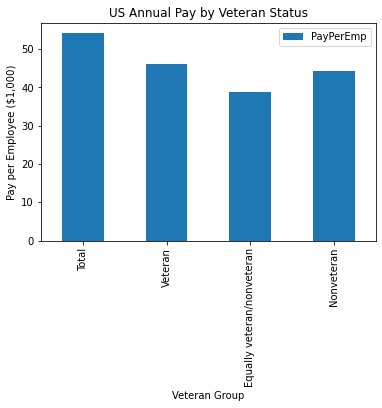

In [19]:
to_plot=df[['VET_GROUP_LABEL']]
to_plot['PAYANN']=pd.to_numeric(df['PAYANN'])
to_plot['EMP']=pd.to_numeric(df['EMP'])
to_plot['PayPerEmp']=to_plot['PAYANN']/to_plot['EMP']
to_plot.drop(['PAYANN','EMP'],inplace=True,axis=1)
to_plot.set_index('VET_GROUP_LABEL',inplace=True)

ax2=to_plot.plot(title='US Annual Pay by Veteran Status',kind='bar')
ax2.set_xlabel('Veteran Group')
ax2.set_ylabel('Pay per Employee ($1,000)')
plt.show()